# 0. Pima

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [4]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [5]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
test = df[split_count:]
train.shape, test.shape

((614, 9), (154, 9))

# 1. 기본 Decision Tree

- 트리 알고리즘 분석하기

## 학습, 예측에 사용할 컬럼

In [6]:
feature_names = df.columns.tolist()
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 정답값이자 예측해야 될 값

In [7]:
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [8]:
X_train = train[feature_names]
display(X_train.head())
X_train.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


(614, 8)

In [9]:
y_train = train[label_name]
display(y_train.head())
y_train.shape

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

(614,)

In [10]:
X_test = test[feature_names]
X_test.shape

(154, 8)

In [11]:
y_test = test[label_name]
y_test.shape

(154,)

## 머신러닝 알고리즘 가져오기

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

### 학습(훈련)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

### 예측


In [14]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

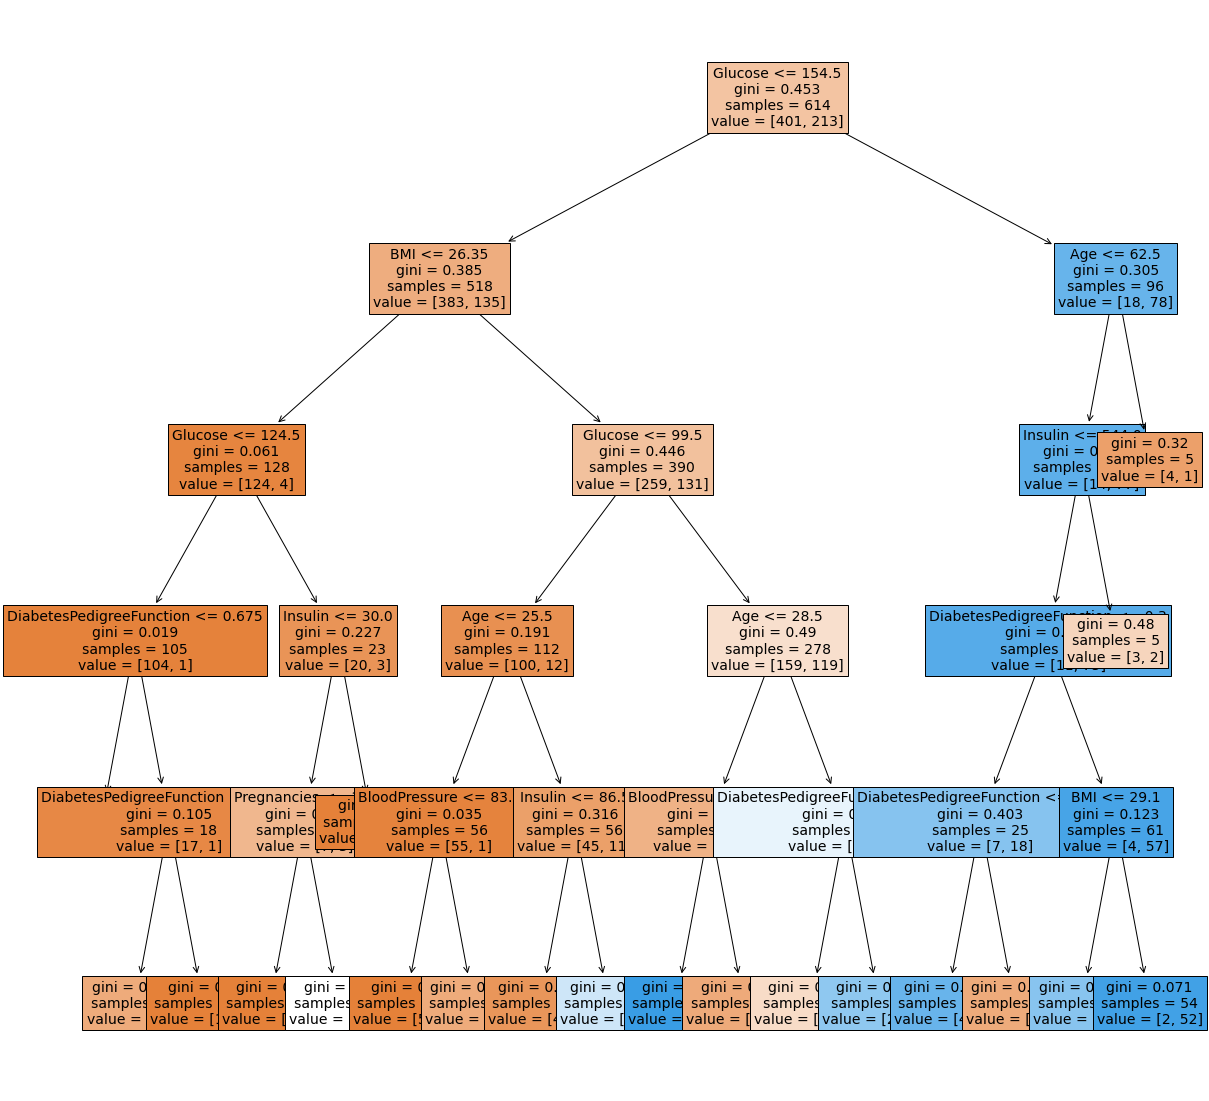

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, max_depth=6, 
          feature_names=feature_names, filled=True, fontsize=14)
plt.show()

In [16]:
model.feature_importances_

array([0.00984349, 0.54410465, 0.04819636, 0.        , 0.04407958,
       0.15302321, 0.08480049, 0.11595222])

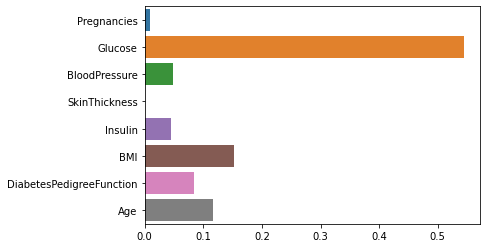

In [17]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

## 정확도(Accuracy) 측정하기

In [18]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test)

0.7792207792207793

# 2. Feature Engineering 해보기

- EDA
- RandomForest

## EDA

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


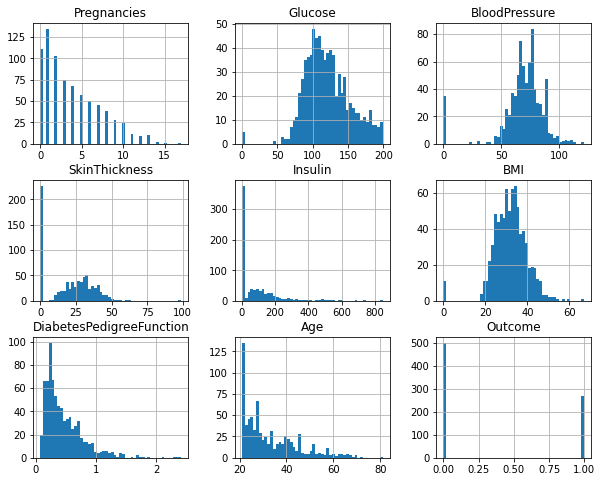

In [20]:
df.hist(figsize=(10, 8), bins=50);

Text(0.5, 1.0, '임신횟수별 당뇨별 발병빈도')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_

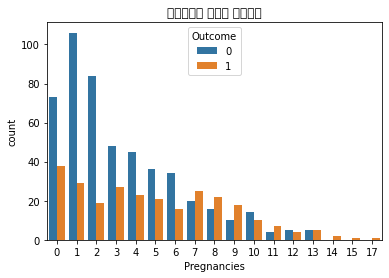

In [21]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")
plt.title("임신횟수별 당뇨별 발병빈도")

Text(0.5, 1.0, '임신횟수별 인슐린 평균')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

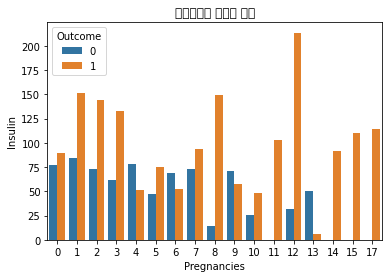

In [22]:
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome", ci=None)
plt.title("임신횟수별 인슐린 평균")

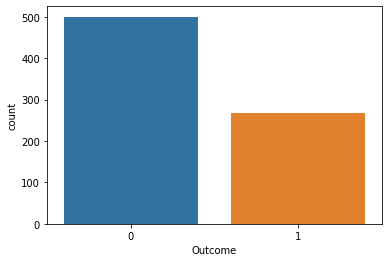

In [23]:
sns.countplot(data=df, x="Outcome")

## Feature Engineering
### 수치형 변수를 범주형 변수로 만들기

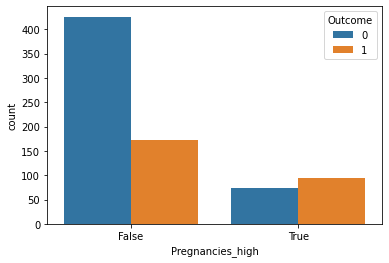

In [24]:
# Pregnancies_high 파생변수 만들기
# 임신횟수가 6보다 큰 값의 True, False 값을 파생변수로 만들기
# 머신러닝 알고리즘에 힌트를 줄수도 있고 오버피팅을 방지할 수도 있습니다.
# 이런 기법을 사용한다고 해서 꼭 성능이 개선되는 것은 아닙니다. 다양한 시도를 해볼 수 있다는 것입니다.
df["Pregnancies_high"] = df["Pregnancies"] > 6

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

### 결측치 다루기

In [25]:
# Insulin의 0 값을 결측치로 만들어 Insulin_nan 이라는 새로운 컬럼을 만들기
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df["Insulin_nan"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [26]:
# 결측치 수
df["Insulin_nan"].isnull().sum()

374

In [27]:
# 결측치 비율
df["Insulin_nan"].isnull().mean() * 100

48.69791666666667

In [28]:
# groupby 로 당뇨병 여부에 따라 평균, 중앙값 구하기
df.groupby("Outcome")[["Insulin", "Insulin_nan"]].describe()

Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [29]:
Insulin_mean = df.groupby("Outcome")["Insulin_nan"].mean()
Insulin_mean

Outcome
0    130.287879
1    206.846154
Name: Insulin_nan, dtype: float64

In [30]:
# 결측치 채우기
df["Insulin_fill"] = df["Insulin_nan"]
df.loc[(df["Outcome"] == 0) & df["Insulin_nan"].isnull(), "Insulin_fill"] = Insulin_mean[0]
df.loc[(df["Outcome"] == 1) & df["Insulin_nan"].isnull(), "Insulin_fill"] = Insulin_mean[1]

In [31]:
# fillna 사용방법
# df["Insulin_fill2"] = df["Insulin_nan"]
# print(df["Insulin_fill2"].isnull().sum())
# df["Insulin_fill2"] = df.loc[(df["Outcome"] == 0), "Insulin_fill2"].fillna(Insulin_mean[0])
# print(df["Insulin_fill2"].isnull().sum())
# df["Insulin_fill2"] = df["Insulin_fill2"].fillna(Insulin_mean[1])
# df["Insulin_fill2"].isnull().sum()

In [32]:
df["Insulin_fill2"] = df["Insulin_nan"]
df.loc[df["Outcome"]==0, "Insulin_fill2"] = df.loc[df["Outcome"]==0, "Insulin_fill2"].fillna(Insulin_mean[0])
df["Insulin_fill2"] = df["Insulin_fill2"].fillna(Insulin_mean[1])

In [33]:
df[["Insulin", "Outcome", "Insulin_nan", "Insulin_fill"]].sample(5)

,Insulin,Outcome,Insulin_nan,Insulin_fill
609,182,0,182.0,182.000000
706,0,1,NaN,206.846154
241,88,0,88.0,88.000000
389,81,0,81.0,81.000000
607,41,0,41.0,41.000000


In [34]:
df[["Insulin", "Insulin_nan", "Insulin_fill", "Insulin_fill2"]].describe()

,Insulin,Insulin_nan,Insulin_fill,Insulin_fill2
count,768.000000,394.000000,768.000000,768.000000
mean,79.799479,155.548223,157.003527,157.003527
std,115.244002,118.775855,88.860914,88.860914
min,0.000000,14.000000,14.000000,14.000000
25%,0.000000,76.250000,121.500000,121.500000
50%,30.500000,125.000000,130.287879,130.287879
75%,127.250000,190.000000,206.846154,206.846154
max,846.000000,846.000000,846.000000,846.000000


### 이상치(outlier) 다루기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

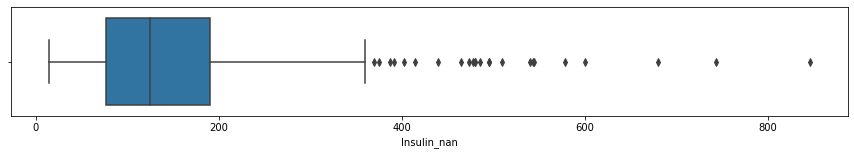

In [35]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [36]:
desc = df["Insulin_nan"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [37]:
df.shape

(768, 13)

In [38]:
IQR = desc["75%"] - desc["25%"]
max_out = desc["75%"] + (IQR * 1.5)
max_out

360.625

In [39]:
# 이상치 찾기
df = df[df["Insulin_fill"] < max_out]
df.shape

(744, 13)

## 학습, 예측 데이터셋 나누기

In [40]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

595

In [41]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
test = df[split_count:]

In [42]:
train.shape, test.shape

((595, 13), (149, 13))

## 정답값이자 예측해야 될 값

In [43]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측에 사용할 컬럼

In [44]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("Pregnancies")
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names.remove("Insulin_fill2")
print(feature_names)

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_fill']


In [45]:
# 위 방법을 사용해도 되고 따로 리스트로 만들어서 사용해도 됩니다.
feature_names = ['Glucose', 'BloodPressure', 
                 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 
                 'Age', 'Pregnancies_high', 'Insulin_fill']
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_fill']

## 학습, 예측 데이터셋 만들기

In [46]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
X_train.shape

(595, 8)

In [47]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(595,)

In [48]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
X_test.shape

(149, 8)

In [49]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(149,)

## 머신러닝 알고리즘 가져오기

In [50]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=42)
# model

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3000, max_depth=6, 
                               min_samples_leaf=3, n_jobs=-1,
                               random_state=42)
model

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=3000,
                       n_jobs=-1, random_state=42)

## 학습(훈련)

In [52]:
X_train.shape

(595, 8)

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=3000,
                       n_jobs=-1, random_state=42)

## 예측

In [55]:
(y_test == y_predict).mean()

0.8926174496644296

# 3. cross validation

In [56]:
# model_selection의 cross_val_predict 로 cv 로 조각을 나눠 valid 데이터의 학습결과 측정하기
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s finished


In [57]:
(y_test == y_predict).mean()

ValueError: ignored